# Zomato Restaurants Rating Analysis (Bangalore)

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don't have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying different factors.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('./zomato.csv')

In [3]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df1 = df.copy()

In [6]:
df1.drop(['url', 'phone', 'dish_liked'], axis=1, inplace=True)

In [7]:
df1.shape

(51717, 14)

In [8]:
df1.duplicated().sum()
df1.drop_duplicates(inplace=True)

In [9]:
#Removing NA

df1.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [10]:
df1.dropna(inplace=True)

Changing the Columns Name

In [11]:
df1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
df1.rename(columns = {'approx_cost(for two people)':'Cost', 'listed_in(type)' : 'Type',
                     'listed_in(city)': 'City' }, inplace = True) 

In [13]:
df1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'Cost', 'reviews_list',
       'menu_item', 'Type', 'City'],
      dtype='object')

In [14]:
df1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,reviews_list,menu_item,Type,City
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [15]:
df1.Cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [16]:
type(df1.Cost)

pandas.core.series.Series

In [17]:
df1.Cost = df1.Cost.apply(lambda x: x.replace(',',''))

In [18]:
df1.Cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [19]:
df1.Cost = df1.Cost.astype(float)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   Cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  Type          43499 non-null  object 
 13  City          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [21]:
df1.shape

(43499, 14)

In [22]:
#Removing '/5' from Rates
df1['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [49]:
df1 = df1.loc[df1.rate !='NEW']
df1 = df1.loc[df1.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '')

In [50]:
df1.rate = df1.rate.apply(remove_slash).str.strip()

In [51]:
df1['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [26]:
df1.to_csv('./zomato(cleaned).csv')

In [27]:
df1["location"] = df1["location"].astype('category').cat.codes

In [28]:
df1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'Cost', 'reviews_list',
       'menu_item', 'Type', 'City'],
      dtype='object')

In [29]:
df1["rest_type"] = df1["rest_type"].astype('category').cat.codes
df1["cuisines"] = df1["cuisines"].astype('category').cat.codes
df1["Type"] = df1["Type"].astype('category').cat.codes
df1["City"] = df1["City"].astype('category').cat.codes
df1["name"] = df1["name"].astype('category').cat.codes
df1["online_order"] = df1["online_order"].astype('category').cat.codes
df1["book_table"] = df1["book_table"].astype('category').cat.codes

In [30]:
#df1.to_csv('./test.csv')

### Feature Engineering

[0.16933035 0.00847974 0.01074585 0.22470724 0.1421504  0.07509223
 0.15688978 0.12797318 0.01479199 0.06983924]


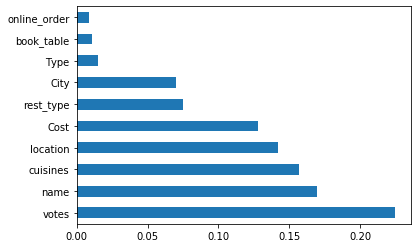

In [31]:
X = df1.iloc[:,[1,2,3,5,6,7,8,9,12,13]]  #independent columns
y = df1.rate   #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [32]:
df1.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,reviews_list,menu_item,Type,City
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",2777,1,1,4.1,775,1,24,1894,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],0,1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",5272,1,0,4.1,787,1,24,816,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],0,1


In [33]:
df2 = df1.copy()

In [34]:
df2.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'Cost', 'reviews_list',
       'menu_item', 'Type', 'City'],
      dtype='object')

In [35]:
df2.drop(['address','online_order', 'book_table','reviews_list',
       'menu_item', 'Type'], axis=1, inplace=True)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.ensemble import  ExtraTreesRegressor
import warnings
warnings.filterwarnings("ignore")

In [37]:
df2.head()

,name,rate,votes,location,rest_type,cuisines,Cost,City
0,2777,4.1,775,1,24,1894,800.0,1
1,5272,4.1,787,1,24,816,800.0,1
2,4882,3.8,918,1,19,653,800.0,1
3,139,3.7,88,1,73,2221,300.0,1
4,2247,3.8,166,4,24,1921,600.0,1


In [38]:
X = df2.drop(['rate'], axis=1)
y = df2.rate

In [39]:
X.shape

(41237, 7)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1,random_state=353)


In [41]:
logistic = LogisticRegression()

cross_val_score(logistic, X_train,y_train)



array([0.15182541, 0.153442  , 0.15047824, 0.15575317, 0.15332794])

In [42]:
d_tree = DecisionTreeClassifier()

score = cross_val_score(d_tree, X_train,y_train)

score.mean()

0.8516961000811966

In [43]:
rf = RandomForestClassifier(n_estimators = 50)

score = cross_val_score(rf, X_train,y_train)

score.mean()

0.8820897838667229

In [44]:
etree = ExtraTreesRegressor(n_estimators = 100)

score = cross_val_score(etree, X_train,y_train)

score.mean()

0.9420342780044102

In [45]:
#Preparing Extra Tree Regression

etree=ExtraTreesRegressor(n_estimators = 100)
etree.fit(X_train,y_train)

y_predict=etree.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test,y_predict)


0.9562992435702389

In [ ]:
testfile= np.column_stack((X_test, y_test))
Output = np.column_stack((testfile, y_predict))

toFile = pd.DataFrame(Output)

toFile.to_csv('./testfile.csv')